In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [28]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
LR.score(X_test,Y_test)

C:\Users\prasa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9703703703703703

In [29]:
sv = SVC()
sv.fit(X_train,Y_train)
sv.score(X_test,Y_test)

0.987037037037037

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.9814814814814815

In [31]:
digits.data = digits.data/255

In [35]:
def get_Score(model,trainx,testx,trainy,testy):
    model.fit(trainx,trainy)
    return model.score(testx,testy)

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kf = StratifiedKFold(n_splits=10)

cross_val_score(LogisticRegression(),digits.data,digits.target,cv=kf)

array([0.85      , 0.91666667, 0.88888889, 0.82222222, 0.89444444,
       0.83888889, 0.92222222, 0.91061453, 0.79329609, 0.90502793])

In [48]:
cross_val_score(SVC(),digits.data,digits.target,cv=kf)

array([0.94444444, 0.98888889, 0.92777778, 0.96666667, 0.98333333,
       0.98888889, 0.98888889, 0.99441341, 0.96089385, 0.95530726])

In [52]:
cross_val_score(RandomForestClassifier(),digits.data,digits.target,cv=kf)

array([0.90555556, 0.96111111, 0.96111111, 0.93888889, 0.96111111,
       0.97777778, 0.98888889, 0.96089385, 0.94972067, 0.93854749])

In [63]:
n_splits_arr = [i for i in range(2,150)]
max_LR = []
max_SV = []
max_RF = []
for splits in n_splits_arr:
    kf = StratifiedKFold(n_splits=splits)
    max_lr = max(cross_val_score(LogisticRegression(),digits.data,digits.target,cv=kf))
    max_svm = max(cross_val_score(SVC(),digits.data,digits.target,cv=kf))
    max_rf = max(cross_val_score(RandomForestClassifier(),digits.data,digits.target,cv=kf))
    max_LR.append(max_lr)
    max_SV.append(max_svm)
    max_RF.append(max_rf)

In [56]:
import matplotlib.pyplot as plt

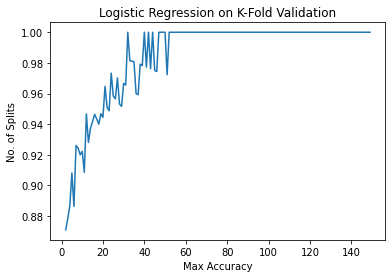

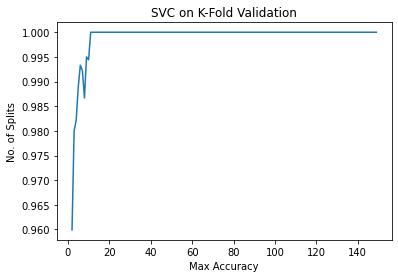

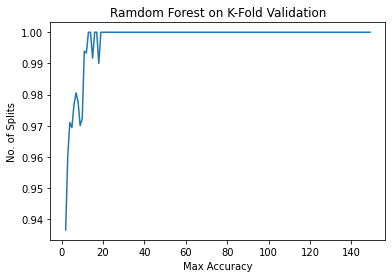

In [64]:
plt.plot(n_splits_arr,max_LR)
plt.xlabel("Max Accuracy")
plt.ylabel("No. of Splits")
plt.title("Logistic Regression on K-Fold Validation")
plt.show()

plt.plot(n_splits_arr,max_SV)
plt.xlabel("Max Accuracy")
plt.ylabel("No. of Splits")
plt.title("SVC on K-Fold Validation")
plt.show()

plt.plot(n_splits_arr,max_RF)
plt.xlabel("Max Accuracy")
plt.ylabel("No. of Splits")
plt.title("Ramdom Forest on K-Fold Validation")
plt.show()